In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Salary_Data.csv')
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


- Given number of years of experience, predict salary

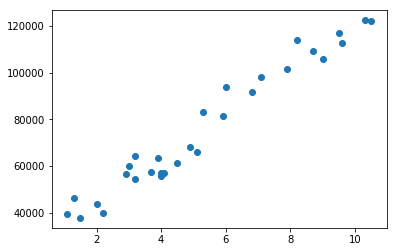

In [7]:
plt.scatter(df['YearsExperience'],df['Salary'])

(array([3., 1., 1., 1., 3., 2., 3., 1., 3., 0., 2., 0., 2., 0., 1., 1., 2.,
        1., 1., 2.]),
 array([ 1.1 ,  1.57,  2.04,  2.51,  2.98,  3.45,  3.92,  4.39,  4.86,
         5.33,  5.8 ,  6.27,  6.74,  7.21,  7.68,  8.15,  8.62,  9.09,
         9.56, 10.03, 10.5 ]),
 <a list of 20 Patch objects>)

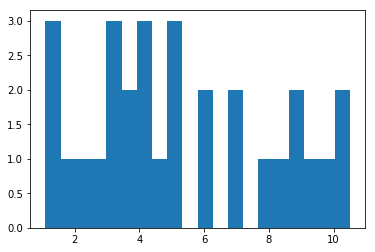

In [10]:
plt.hist(df['YearsExperience'], bins=20)

(array([3., 1., 1., 1., 5., 2., 3., 1., 0., 0., 2., 0., 1., 1., 1., 1., 2.,
        2., 1., 2.]),
 array([ 37731.,  41964.,  46197.,  50430.,  54663.,  58896.,  63129.,
         67362.,  71595.,  75828.,  80061.,  84294.,  88527.,  92760.,
         96993., 101226., 105459., 109692., 113925., 118158., 122391.]),
 <a list of 20 Patch objects>)

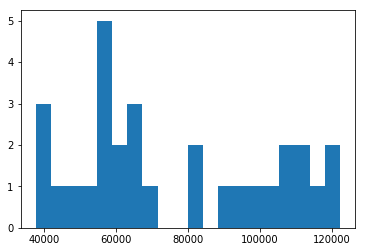

In [11]:
plt.hist(df['Salary'], bins=20)

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
df['YearsExperience'], df['Salary']

(0      1.1
 1      1.3
 2      1.5
 3      2.0
 4      2.2
 5      2.9
 6      3.0
 7      3.2
 8      3.2
 9      3.7
 10     3.9
 11     4.0
 12     4.0
 13     4.1
 14     4.5
 15     4.9
 16     5.1
 17     5.3
 18     5.9
 19     6.0
 20     6.8
 21     7.1
 22     7.9
 23     8.2
 24     8.7
 25     9.0
 26     9.5
 27     9.6
 28    10.3
 29    10.5
 Name: YearsExperience, dtype: float64, 0      39343.0
 1      46205.0
 2      37731.0
 3      43525.0
 4      39891.0
 5      56642.0
 6      60150.0
 7      54445.0
 8      64445.0
 9      57189.0
 10     63218.0
 11     55794.0
 12     56957.0
 13     57081.0
 14     61111.0
 15     67938.0
 16     66029.0
 17     83088.0
 18     81363.0
 19     93940.0
 20     91738.0
 21     98273.0
 22    101302.0
 23    113812.0
 24    109431.0
 25    105582.0
 26    116969.0
 27    112635.0
 28    122391.0
 29    121872.0
 Name: Salary, dtype: float64)

In [103]:
# X = df['YearsExperience']
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=101)

In [104]:
X, y

(    YearsExperience
 0               1.1
 1               1.3
 2               1.5
 3               2.0
 4               2.2
 5               2.9
 6               3.0
 7               3.2
 8               3.2
 9               3.7
 10              3.9
 11              4.0
 12              4.0
 13              4.1
 14              4.5
 15              4.9
 16              5.1
 17              5.3
 18              5.9
 19              6.0
 20              6.8
 21              7.1
 22              7.9
 23              8.2
 24              8.7
 25              9.0
 26              9.5
 27              9.6
 28             10.3
 29             10.5, 0      39343.0
 1      46205.0
 2      37731.0
 3      43525.0
 4      39891.0
 5      56642.0
 6      60150.0
 7      54445.0
 8      64445.0
 9      57189.0
 10     63218.0
 11     55794.0
 12     56957.0
 13     57081.0
 14     61111.0
 15     67938.0
 16     66029.0
 17     83088.0
 18     81363.0
 19     93940.0
 20     91738.0
 21     98273

In [105]:
len(X_train), len(X_test), len(y_train), len(y_test)

(20, 10, 20, 10)

In [106]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
lr.coef_, lr.intercept_
# y = lr.coef_ * X + lr.intercept_
# y = 9692.26318876 * X + 25570.538282485482

(array([9692.26318876]), 25570.538282485482)

In [108]:
y_pred = lr.predict(X_test)

In [109]:
pd.DataFrame({'predicted':y_pred, 'actual':y_test})

,predicted,actual
20,91477.927966,91738.0
24,109893.228025,109431.0
7,56585.780487,54445.0
18,82754.891096,81363.0
2,40108.933066,37731.0
27,118616.264895,112635.0
26,117647.038576,116969.0
16,75001.080545,66029.0
25,112800.906981,105582.0
28,125400.849127,122391.0


In [110]:
y_model_values1 = [lr.coef_ * x + lr.intercept_ for x in df['YearsExperience']]
y_model_values2 = lr.predict(X)
y_model_values3 = lr.coef_ * df['YearsExperience'] + lr.intercept_

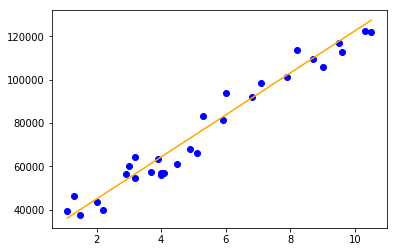

In [111]:
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
#plt.scatter(df['YearsExperience'], y_model_values1, color='red')
#plt.scatter(df['YearsExperience'], y_model_values2, color='orange')
#plt.plot(df['YearsExperience'], y_model_values1, color='red')
plt.plot(df['YearsExperience'], y_model_values2, color='orange')

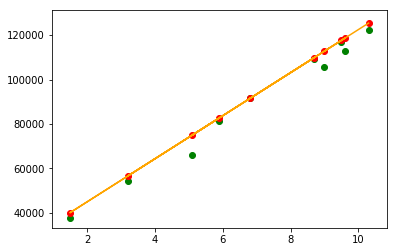

In [112]:
plt.scatter(X_test, y_test, color='green')
plt.scatter(X_test, y_pred, color='red')
#plt.plot(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='orange')


In [113]:
lr.predict(14), lr.predict([[14]])

(array([161262.22292507]), array([161262.22292507]))

In [114]:
import math

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", math.sqrt(mean_squared_error(y_test, y_pred)))

MAE 3249.304483022086
MSE 19036146.491626855
RMSE 4363.043260343273


random_state = 101
MAE 3249.304483022086
MSE 19036146.491626855
RMSE 4363.043260343273

random_state = 11
MAE 4865.007791330203
MSE 29399137.02084305
RMSE 5422.09710544205

random_state = 1
MAE 5049.818093659744
MSE 37496296.6187984
RMSE 6123.421969683161
